In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint
from sklearn import metrics

In [109]:
results_dir = "/s/red/b/nobackup/data/eggnog_cpm/training_files/common_train/0814180500pm/testing/results/"
# results_dir = "/s/red/b/nobackup/data/eggnog_cpm/training_files/rmpe_test/test_320x240/testing/results/"
npy_file_pck = 'test_pck_ep3_nTest_5000_time081420181503.npy'
npy_file_pckh = 'test_pckh_ep3_nTest_5000_time081420181503.npy'

# pck
pck = np.load(os.path.join(results_dir, npy_file_pck))
print("pck\n")
pprint.pprint(pck)
print(pck.shape)
# pck_at = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
# pck_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
pck_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pck_at\n", pck_at)

# pckh
pckh = np.load(os.path.join(results_dir, npy_file_pckh))
print("\npckh\n")
pprint.pprint(pckh)
print(pckh.shape)
# pckh_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
pckh_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pckh_at\n", pckh_at)


joints = ['Head', 'Spine_Shoulder (Neck)', 'Left Shoulder', 'Left Elbow', 'Left Wrist', 'Right Shoulder', 'Right Elbow', 'Right Wrist', 'Left Hip', 'Right Hip']
print("\njoints", joints)

pck

array([[0.    , 0.0142, 0.2168, 0.633 , 0.8554, 0.9576, 0.9862, 0.994 ,
        0.9966, 0.998 , 0.998 , 0.998 , 0.9986, 0.9996, 0.9996, 0.9996,
        0.9996],
       [0.    , 0.0214, 0.1456, 0.357 , 0.5792, 0.7648, 0.8794, 0.9432,
        0.9734, 0.9868, 0.993 , 0.9984, 0.9986, 0.9986, 0.9986, 0.9994,
        0.9994],
       [0.    , 0.053 , 0.2966, 0.5678, 0.7996, 0.9144, 0.9716, 0.9872,
        0.9956, 0.997 , 0.9974, 0.9976, 0.9978, 0.9978, 0.9986, 0.9986,
        0.9986],
       [0.    , 0.0286, 0.1708, 0.4194, 0.6354, 0.7688, 0.86  , 0.9234,
        0.9502, 0.9664, 0.9742, 0.9842, 0.988 , 0.99  , 0.9932, 0.9938,
        0.9938],
       [0.    , 0.0222, 0.1062, 0.2164, 0.3334, 0.4272, 0.5272, 0.6176,
        0.6786, 0.721 , 0.756 , 0.7994, 0.826 , 0.8396, 0.8422, 0.845 ,
        0.8468],
       [0.    , 0.0438, 0.208 , 0.4664, 0.7396, 0.8888, 0.9608, 0.9848,
        0.9924, 0.9942, 0.9954, 0.9956, 0.996 , 0.9968, 0.9968, 0.9968,
        0.997 ],
       [0.    , 0.0224, 0.104

(5, 2)


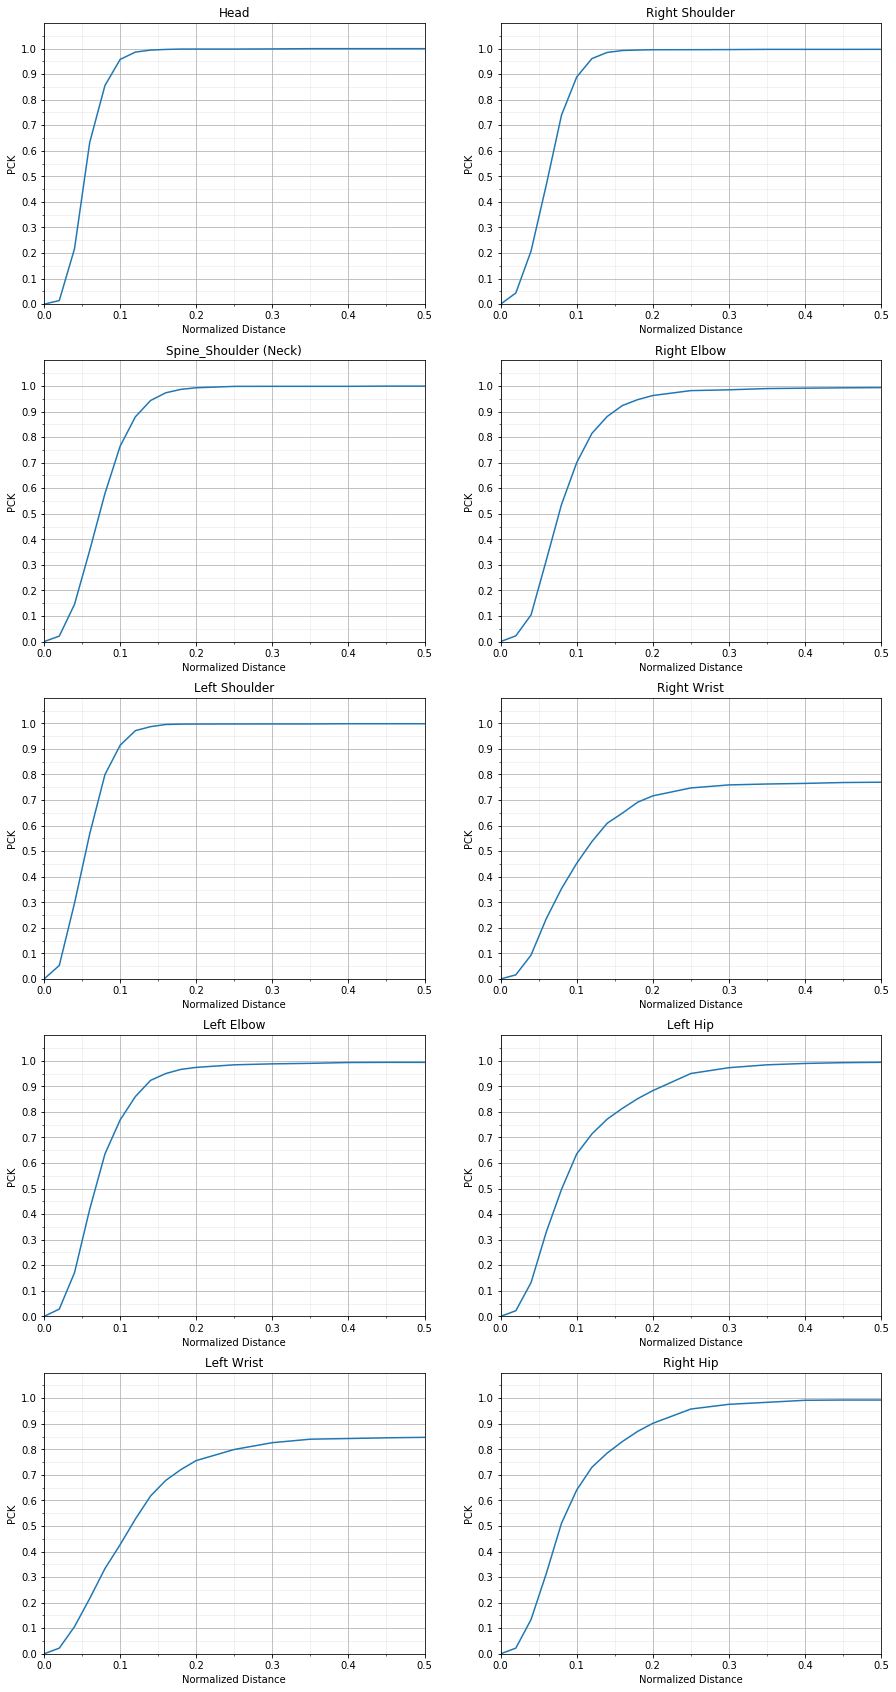

In [110]:
##### pck
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
# ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()
fig.set_size_inches((15, 30))

x = pck_at
x_label = "Normalized Distance"
y_label = "PCK"

# # 1 head
# y = pck[0]
# ax0.plot(x,y)
# # ax0.legend(prop={'size': 10})
# ax0.set(xlabel=x_label, ylabel=y_label, title='Head')
# ax0.grid()

for p in range(pck.shape[0]):
    i = p%5
    j = 0 if p<5 else 1
    
    y = pck[p]
#     ax[p].imshow(np.zeros((10,10)))
    
    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)


    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')

    
# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_individual_joints.png"))

mean pck [0.      0.02662 0.16084 0.3858  0.58396 0.71508 0.7981  0.84966 0.88032
 0.90228 0.91778 0.94102 0.94982 0.9543  0.9567  0.958   0.95854] (17,)
Area under the curve 0.400131


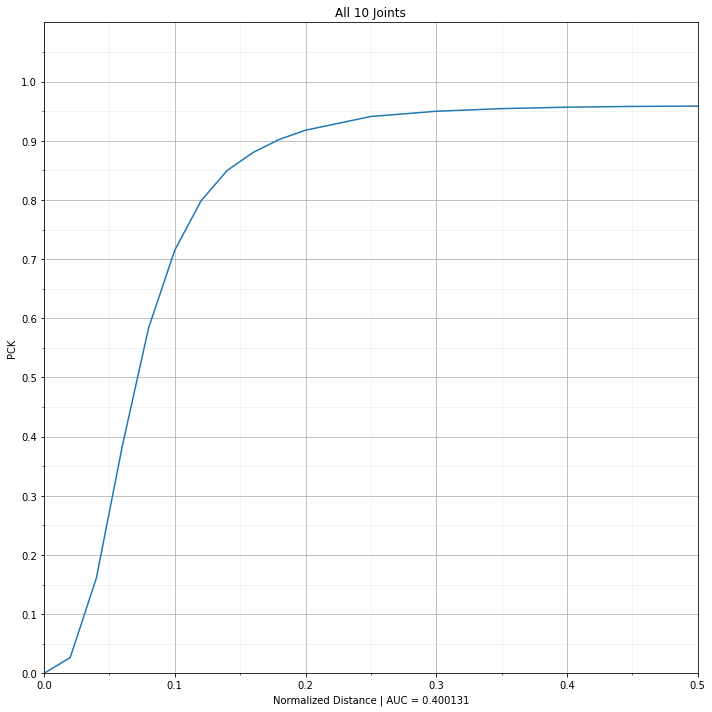

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pck_at

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pck, axis=0)
print("mean pck", y, y.shape)
auc = round(metrics.auc(x, y), 7)
print("Area under the curve", auc)

x_label = "Normalized Distance" + " | AUC = " + str(auc)
y_label = "PCK"

ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All 10 Joints')
ax.grid(linestyle = '-')

fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_all_AUC_" + str(auc) + ".png"))


(5, 2)


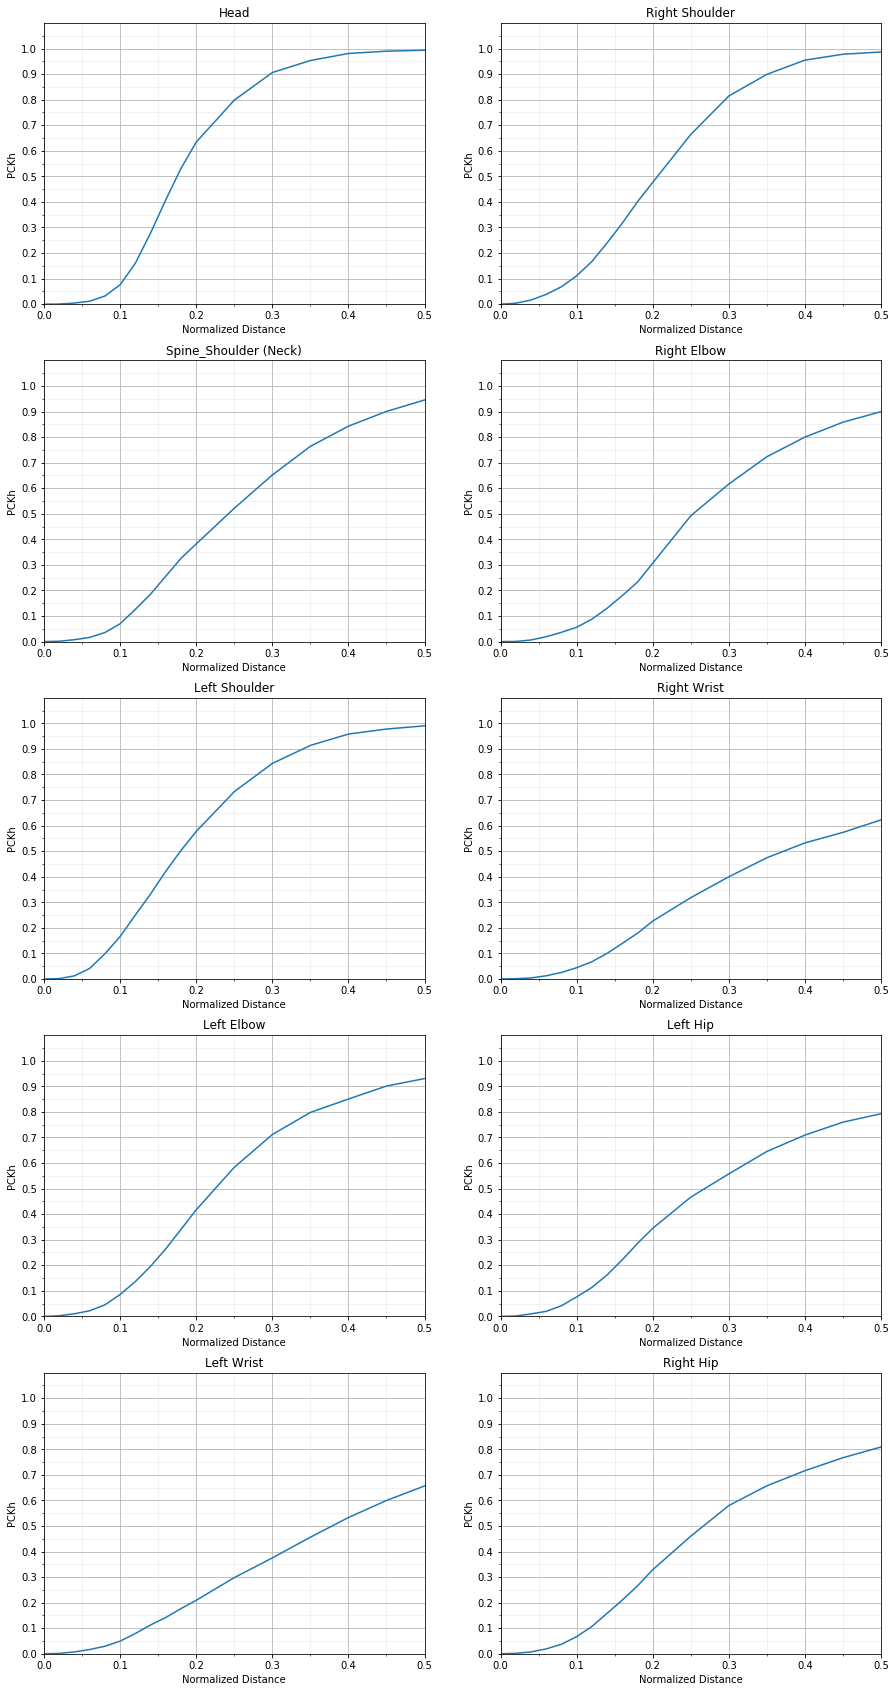

In [112]:
##### pckh
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
fig.set_size_inches((15, 30))

x = pckh_at
x_label = "Normalized Distance"
y_label = "PCKh"
for p in range(pckh.shape[0]):
    i = p%5
    j = 0 if p<5 else 1
    
    y = pckh[p]

    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)


    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')

# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_individual_joints.png"))

mean pck [0.      0.00164 0.00856 0.02174 0.04502 0.08024 0.12958 0.18982 0.2562
 0.32432 0.39048 0.53364 0.64572 0.72848 0.78784 0.8306  0.86264] (17,)
Area under the curve 0.2326892


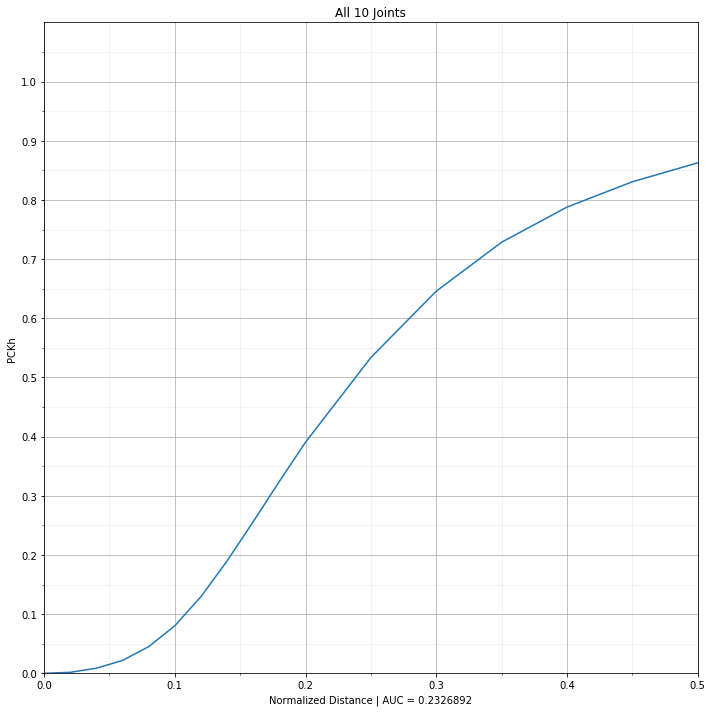

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pckh_at

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pckh, axis=0)
print("mean pck", y, y.shape)
auc = round(metrics.auc(x, y), 7)
print("Area under the curve", auc)

x_label = "Normalized Distance" + " | AUC = " + str(auc)
y_label = "PCKh"

ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All 10 Joints')
ax.grid(linestyle = '-')

fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_all_AUC_" + str(auc) + ".png"))
